In [330]:
import pandas as pd
import seaborn as sns
from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)

In [138]:
data = pd.read_csv("../input/doi-tuong-khach-hang.csv")

In [140]:
columns = []
current_parent = ""
for i, item in enumerate(data.iloc[2]):
    if not pd.isna(item):
        formated_item = item.strip()
        current_parent = formated_item
        if not pd.isna(data.iloc[3, i]):
            formated_child = data.iloc[3, i].strip()
            columns.append("__".join([current_parent, formated_child]))
        else:    
            columns.append(formated_item)
    else:
        formated_child = data.iloc[3, i].strip()
        columns.append("__".join([current_parent, formated_child]))

In [141]:
data.columns = columns
data = data[4:]
data.shape

(2502, 34)

In [142]:
# preprocess column data

# convert to numner
for column in data.columns:
    try:
        converted = data[column].apply(pd.to_numeric, downcast='float')
        data[column] = converted
    except Exception as e:
        pass
    
# remove row that has missing Bravo_ID
for column in data.columns:
    if 'Hạn mức công nợ' in column or 'DOANH SỐ' in column:
        data[column] = data[column].str.replace(',', '')
        data[column] =  data[[column]].apply(pd.to_numeric, downcast='float', errors='coerce')
data = data.dropna(subset=['Mã Bravo'])

#pre-process all string column
for obj_type_column in data.dtypes[data.dtypes == 'object'].index:
    data[obj_type_column] = data[obj_type_column].str.strip()
    
data.shape

(2501, 34)

In [143]:
data.head()

,Mã Bravo,Mã Unis,Tên đối tượng,Loại đối tượng,Số lịch sử GD,Địa chỉ,Mã số thuế,Số CMND,Đối tác,Điện thoại,...,UNILUX__Mã NVKD,UNILUX__Nhân viên kinh doanh,UNILUX__Hạn mức công nợ,UNILUX__Htt bán lẻ,UNILUX__Htt kéo cont,UNILUX__Htt cắt lô,Mã chi nhánh,Nhóm loại,ĐVCS,DOANH SỐ
4,KH07878,ALOGACH,Alo gạch Phú Chánh - công ty cổ phần Alo Gạch,"Đơn vị, tổ chức",45.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,060,KH,NaN,23492000.0
5,KH05996,009.ANLOCPHAT,AN LỘC PHÁT,"Đơn vị, tổ chức",157.0,NaN,NaN,NaN,NaN,NaN,...,US1-1050,Trần Ngọc Hiền,50000000.0,NaN,NaN,NaN,"035,008,062,076",KH,NaN,175210.0
6,KH07115,011.HIEP,CH HIỆP,Cá nhân,168.0,NaN,NaN,NaN,NaN,NaN,...,US1-1127,Lê Phúc Hậu,70000000.0,15.0,5.0,5.0,"011,055",KH,NaN,72789440.0
7,KH03950,008.MUOIOAI,CH 10 OAI,Cá nhân,95.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,008,KH,NaN,3301920.0
8,KH01117,008.3LINH,CH 3 Linh,Cá nhân,221.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,008,KH,NaN,6658990.0


In [144]:
data.dtypes

Mã Bravo                         object
Mã Unis                          object
Tên đối tượng                    object
Loại đối tượng                   object
Số lịch sử GD                   float64
Địa chỉ                         float64
Mã số thuế                      float64
Số CMND                         float64
Đối tác                         float64
Điện thoại                      float64
Nhóm mẹ                          object
ShowRoom                        float64
UNIS__Mã NVKD                    object
UNIS__Nhân viên kinh doanh       object
UNIS__Hạn mức công nợ           float32
UNIS__Htt bán lẻ                float64
UNIS__Htt kéo cont              float64
UNIS__Htt cắt lô                float64
UNIMAX__Mã NVKD                  object
UNIMAX__Nhân viên kinh doanh     object
UNIMAX__Hạn mức công nợ         float32
UNIMAX__Htt bán lẻ              float64
UNIMAX__Htt kéo cont            float64
UNIMAX__Htt cắt lô              float64
UNILUX__Mã NVKD                  object


/Volumes/Data/Gmartek/ba-analyer-sample/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


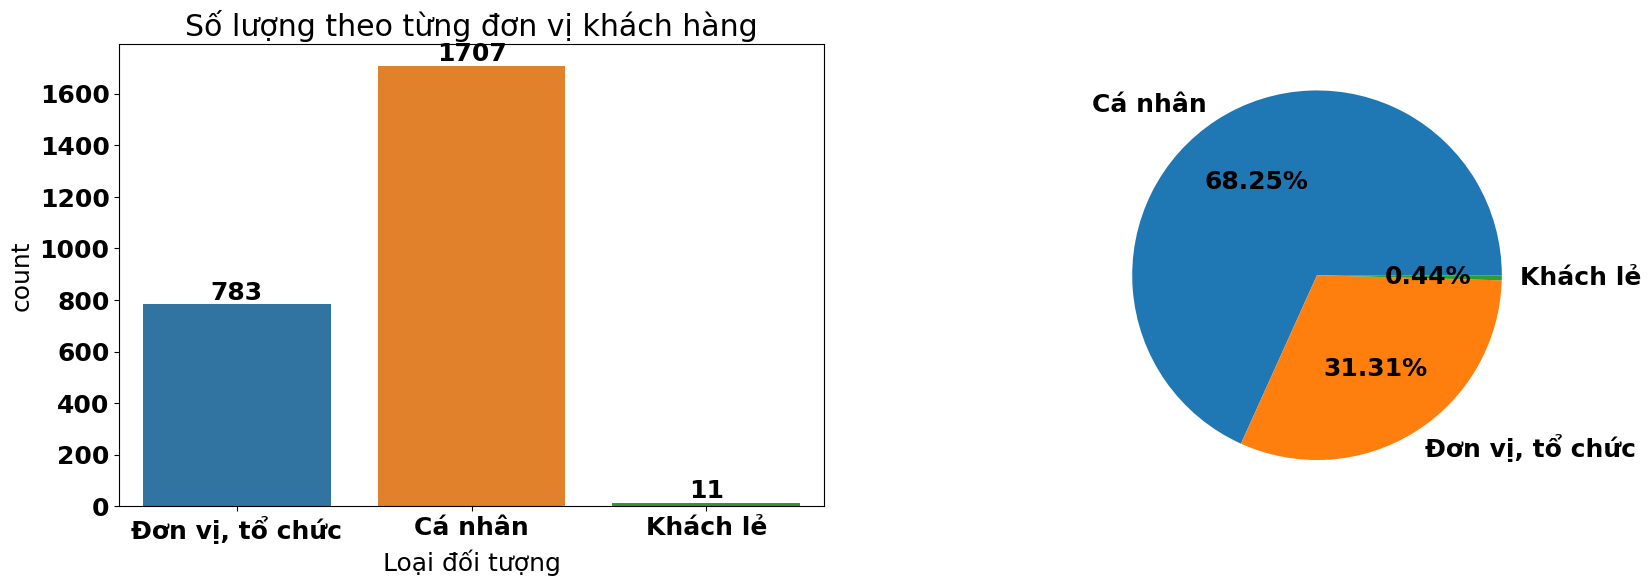

In [501]:
# names = data['Tên đối tượng']
# data[names.isin(names[names.duplicated()])].sort_values('Tên đối tượng')
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, sharey = False, figsize = (20,6))
ax = sns.countplot(data["Loại đối tượng"], ax=ax1)
ax.bar_label(ax.containers[0])
ax.set_title("Số lượng theo từng đơn vị khách hàng")
segments = data['Loại đối tượng'].value_counts() / data["Loại đối tượng"].count() * 100
pl2 = ax2.pie(segments, labels = segments.index, autopct='%.02f%%')

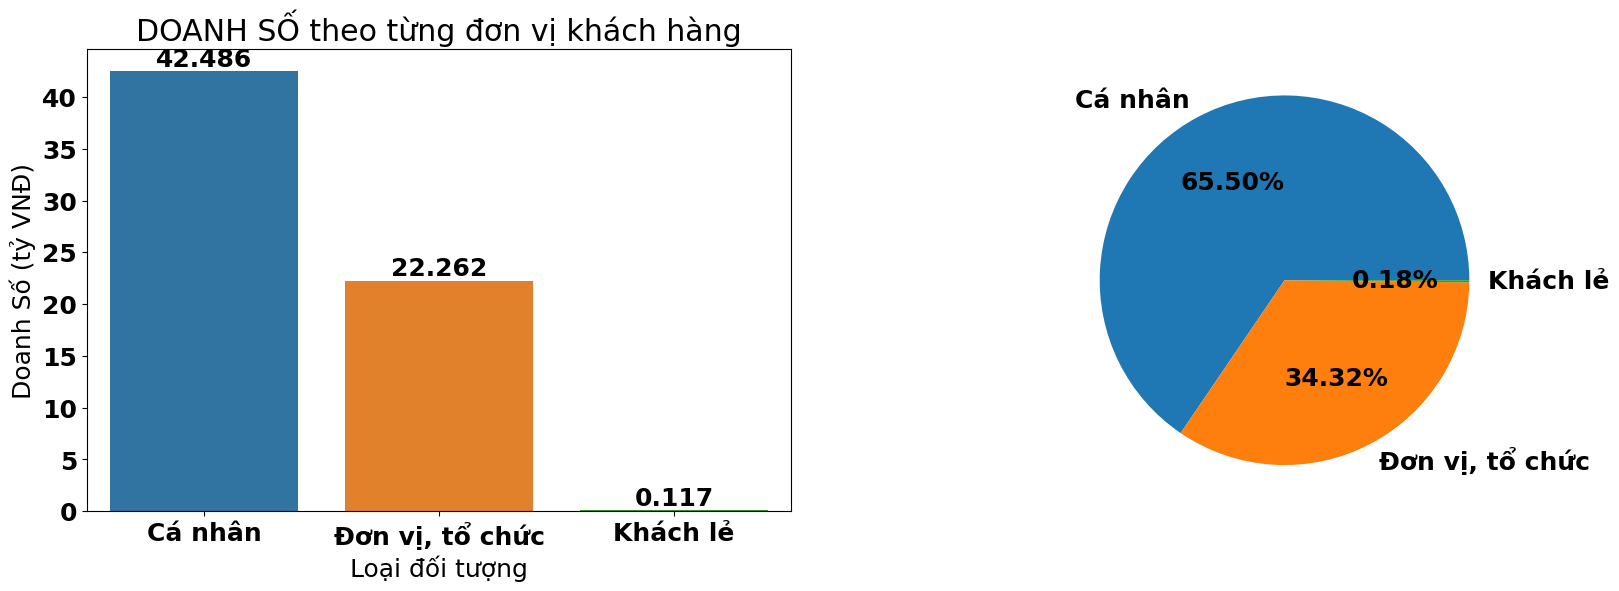

In [503]:
top_customers = data.groupby("Loại đối tượng")["DOANH SỐ"].sum().reset_index().sort_values("DOANH SỐ", ascending=False)
top_customers["DOANH SỐ"] = top_customers["DOANH SỐ"] / 1e9
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, sharey = False, figsize = (20,6))
ax = sns.barplot(data=top_customers, x="Loại đối tượng", y="DOANH SỐ", ax=ax1)
ax.set_ylabel('Doanh Số (tỷ VNĐ)')
ax.bar_label(ax.containers[0], labels=['%.3f' % doanh_so for doanh_so in top_customers["DOANH SỐ"]])
ax.set_title("DOANH SỐ theo từng đơn vị khách hàng")

plt2 = ax2.pie(top_customers["DOANH SỐ"], labels = top_customers["Loại đối tượng"], autopct='%.02f%%')


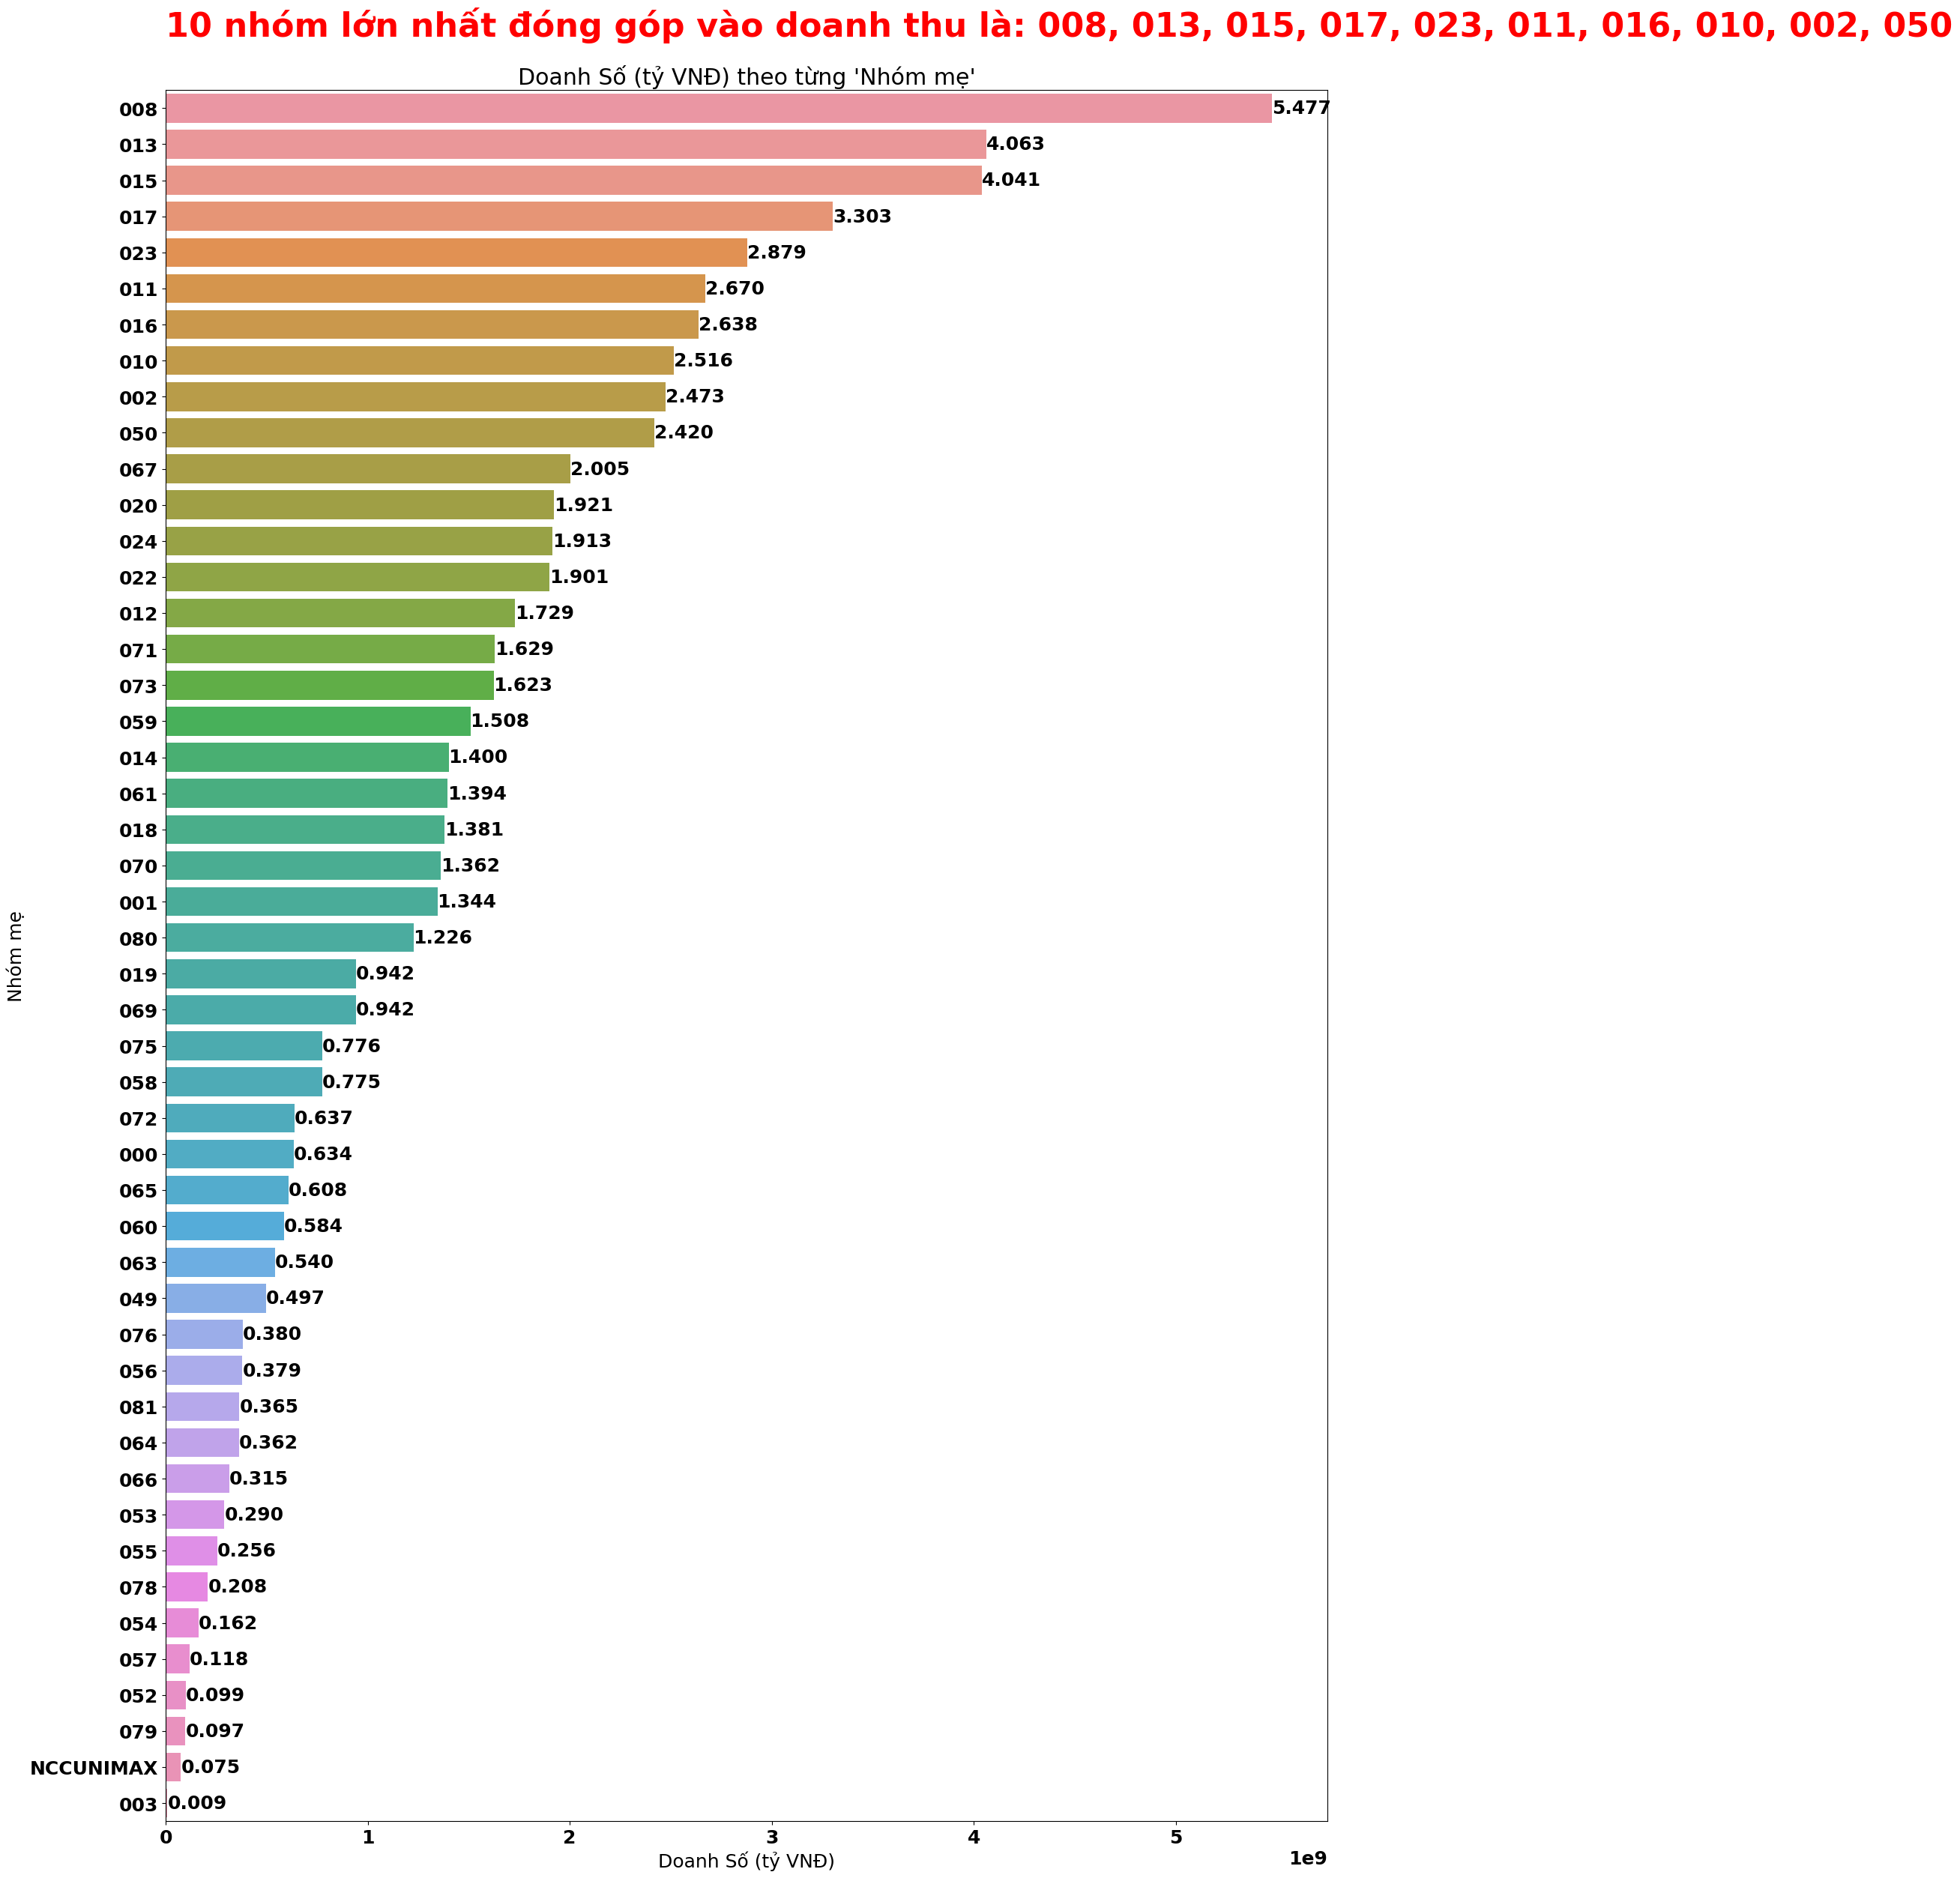

In [526]:
top_customers = data.groupby("Nhóm mẹ")["DOANH SỐ"].sum().reset_index().sort_values("DOANH SỐ", ascending=False)
max_count = top_customers.shape[0] #10
segments = top_customers["DOANH SỐ"][:max_count]

fig, (ax1) = plt.subplots(nrows=1, ncols=1, sharey = False, figsize = (20,30))
ax = sns.barplot(data=top_customers[:max_count], y="Nhóm mẹ", x="DOANH SỐ", ax=ax1, orient = 'h')
ax.set_xlabel('Doanh Số (tỷ VNĐ)')
ax.set_title("Doanh Số (tỷ VNĐ) theo từng 'Nhóm mẹ'")
plt1 = ax.bar_label(ax.containers[0], labels=['%.3f' % (doanh_so / 1e9) for doanh_so in segments])

max_count = 10
groups = ", ".join(top_customers.iloc[:max_count]["Nhóm mẹ"])

plt1 = ax.text(0, -2, f"""{max_count} nhóm lớn nhất đóng góp vào doanh thu là: {groups}""", fontsize=32, color='r')

# max_count = 10
# regroup_top_customers = top_customers.copy()
# regroup_top_customers.iloc[max_count:, 0] = "Others"
# top_customers = regroup_top_customers.groupby("Nhóm mẹ")["DOANH SỐ"].sum().reset_index().sort_values("DOANH SỐ", ascending=False)


# fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, sharey = False, figsize = (20,6))
# ax = sns.barplot(data=top_customers, y="Nhóm mẹ", x="DOANH SỐ", ax=ax1)
# ax.set_ylabel('Doanh Số (tỷ VNĐ)')
# ax.bar_label(ax.containers[0], labels=['%.3f' % (doanh_so / 1e9) for doanh_so in top_customers["DOANH SỐ"]])

# plt2 = ax2.pie(top_customers["DOANH SỐ"], labels = top_customers["Nhóm mẹ"], autopct='%.02f%%')


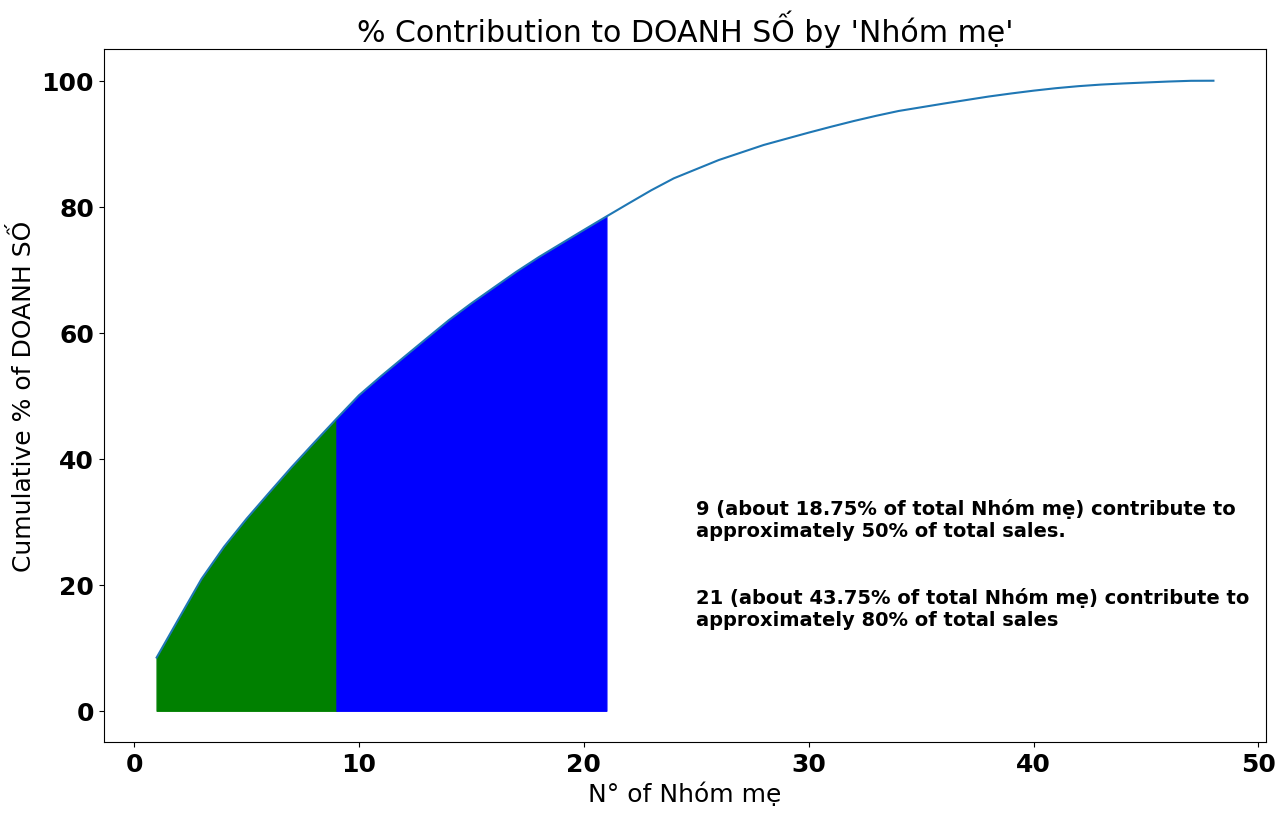

In [485]:
top_customers = data.groupby("Nhóm mẹ")["DOANH SỐ"].sum().reset_index().sort_values("DOANH SỐ", ascending=False)
top_customers["% of DOANH SỐ"] = (top_customers["DOANH SỐ"] / top_customers["DOANH SỐ"].sum()) * 100
top_customers["Cumulative % of DOANH SỐ"] = top_customers["% of DOANH SỐ"].cumsum() 

total_group = top_customers.shape[0]
FIRST_THRESHOLD_PERCENTAGE = 50
total_first_group_contribute_to_threshold = (top_customers['Cumulative % of DOANH SỐ'] < FIRST_THRESHOLD_PERCENTAGE).sum()
first_group_meet_threshold = top_customers[top_customers['Cumulative % of DOANH SỐ'] > FIRST_THRESHOLD_PERCENTAGE].iloc[0]

SECOND_THRESHOLD_PERCENTAGE = 80
total_second_group_contribute_to_threshold = (top_customers['Cumulative % of DOANH SỐ'] < SECOND_THRESHOLD_PERCENTAGE).sum()
second_group_meet_threshold = top_customers[top_customers['Cumulative % of DOANH SỐ'] > SECOND_THRESHOLD_PERCENTAGE].iloc[0]



plt.figure(figsize=(15,9))
ax = sns.lineplot(x=range(1,len(top_customers)+1), y="Cumulative % of DOANH SỐ", data=top_customers)
ax.set_xlabel("N° of Nhóm mẹ")
ax.set_title("% Contribution to DOANH SỐ by 'Nhóm mẹ'")
a=np.arange(1,len(top_customers)+1)
b=top_customers["Cumulative % of DOANH SỐ"]
plt.fill_between(a, b, 0,
                 where = (a >= 0) & (a <= total_first_group_contribute_to_threshold),
                 color = 'g')
plt.fill_between(a, b, 0,
                 where = (a >= total_first_group_contribute_to_threshold) & (a <= total_second_group_contribute_to_threshold),
                 color = 'b')

ratio1 = "{:.2f}".format(total_first_group_contribute_to_threshold / total_group * 100)
ratio2 = "{:.2f}".format(total_second_group_contribute_to_threshold / total_group * 100)
plt1 = ax.text(25, 10, f"""{total_first_group_contribute_to_threshold} (about {ratio1}% of total Nhóm mẹ) contribute to 
approximately {FIRST_THRESHOLD_PERCENTAGE}% of total sales.\n\n
{total_second_group_contribute_to_threshold} (about {ratio2}% of total Nhóm mẹ) contribute to 
approximately {SECOND_THRESHOLD_PERCENTAGE}% of total sales
""", fontsize=14)




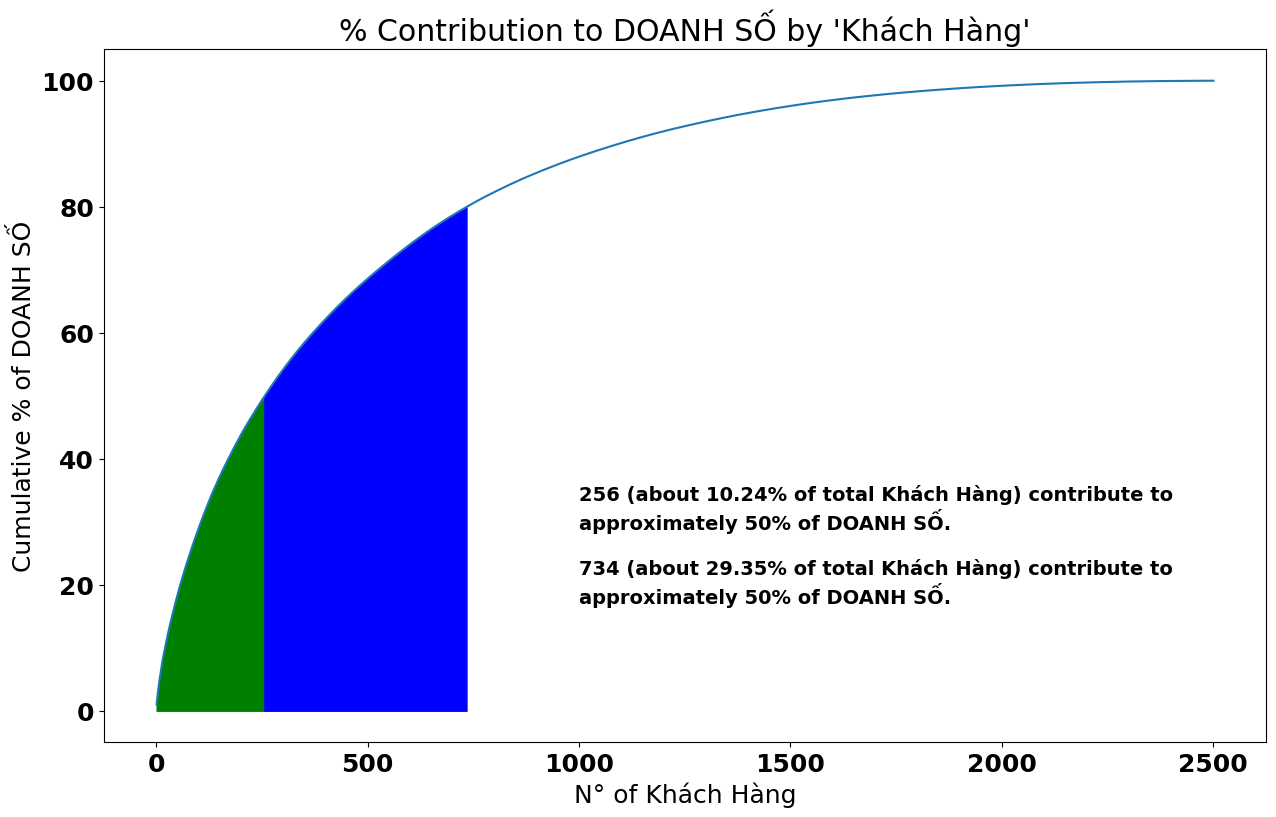

In [477]:
top_customers = data.sort_values("DOANH SỐ", ascending=False)
top_customers["% of DOANH SỐ"] = (top_customers["DOANH SỐ"] / top_customers["DOANH SỐ"].sum()) * 100
top_customers["Cumulative % of DOANH SỐ"] = top_customers["% of DOANH SỐ"].cumsum() 

total_group = top_customers.shape[0]
FIRST_THRESHOLD_PERCENTAGE = 50
total_first_group_contribute_to_threshold = (top_customers['Cumulative % of DOANH SỐ'] < FIRST_THRESHOLD_PERCENTAGE).sum()
first_group_meet_threshold = top_customers[top_customers['Cumulative % of DOANH SỐ'] > FIRST_THRESHOLD_PERCENTAGE].iloc[0]

SECOND_THRESHOLD_PERCENTAGE = 80
total_second_group_contribute_to_threshold = (top_customers['Cumulative % of DOANH SỐ'] < SECOND_THRESHOLD_PERCENTAGE).sum()
second_group_meet_threshold = top_customers[top_customers['Cumulative % of DOANH SỐ'] > SECOND_THRESHOLD_PERCENTAGE].iloc[0]

plt.figure(figsize=(15,9))
ax = sns.lineplot(x=range(1,len(top_customers)+1), y="Cumulative % of DOANH SỐ", data=top_customers)
ax.set_xlabel("N° of Khách Hàng")
ax.set_title("% Contribution to DOANH SỐ by 'Khách Hàng'")
a=np.arange(1,len(top_customers)+1)
b=top_customers["Cumulative % of DOANH SỐ"]
plt.fill_between(a, b, 0,
                 where = (a >= 0) & (a <= total_first_group_contribute_to_threshold),
                 color = 'g')
plt.fill_between(a, b, 0,
                 where = (a >= total_first_group_contribute_to_threshold) & (a <= total_second_group_contribute_to_threshold),
                 color = 'b')

ratio1 = "{:.2f}".format(total_first_group_contribute_to_threshold / total_group * 100)
ratio2 = "{:.2f}".format(total_second_group_contribute_to_threshold / total_group * 100)
plt1 = ax.text(1000, 10, f"""{total_first_group_contribute_to_threshold} (about {ratio1}% of total Khách Hàng) contribute to 
approximately {FIRST_THRESHOLD_PERCENTAGE}% of DOANH SỐ.\n
{total_second_group_contribute_to_threshold} (about {ratio2}% of total Khách Hàng) contribute to 
approximately {FIRST_THRESHOLD_PERCENTAGE}% of DOANH SỐ.
""", fontsize=14)

## UNIS/UNIMAX/UNILUX Analytics

In [320]:
customer_without_unis_num = data[data['UNIS__Mã NVKD'].isna() & data['UNIMAX__Mã NVKD'].isna() & data['UNILUX__Mã NVKD'].isna()]
print(f"There is/are {customer_without_unis_num.shape[0]} customer do not belong to any UNIS/UNIMAX/UNILUX group")


There is/are 1 customer do not belong to any UNIS/UNIMAX/UNILUX group


In [322]:
customer_all_unis_num = data[data['UNIS__Mã NVKD'].notnull() & data['UNIMAX__Mã NVKD'].notnull() & data['UNILUX__Mã NVKD'].notnull()]
percent = "{:.2f}".format(customer_all_unis_num.shape[0] / data.shape[0] * 100)
print(f"There is/are {customer_all_unis_num.shape[0]} ({percent})% customer belong to all three UNIS/UNIMAX/UNILUX groups")


There is/are 516 (20.63)% customer belong to all three UNIS/UNIMAX/UNILUX groups


In [398]:
columns = ['UNIS__Mã NVKD', 'UNIMAX__Mã NVKD', 'UNILUX__Mã NVKD']
def type_combination(data, columns, count):
    comb = combinations(columns, count)
    output = pd.DataFrame(columns=['Label', 'Count', "DOANH SỐ"])
    for item in list(comb):
        true_columns = set()
        expression = True
        label = ""
        for c in item:
            true_columns.add(c)
            column_short = c.split("__")[0].lower()
            label += f" ({column_short})"
            expression = expression & data[c].notnull()
        # only positive column
        if count and count != len(columns):
            result = data[expression]
            output = pd.concat([output, pd.DataFrame([[label, result.shape[0], result['DOANH SỐ'].sum()]], columns=['Label', 'Count', "DOANH SỐ"])], ignore_index=True)
        
        
        # include negative column    
        false_columns = set(columns) - true_columns
        for c in false_columns:
            expression = expression & data[c].isna()
            column_short = c.split("__")[0].lower()
            label += f" (NOT {column_short})"
        result = data[expression]
        output = pd.concat([output, pd.DataFrame([[label, result.shape[0], result['DOANH SỐ'].sum()]], columns=['Label', 'Count', "DOANH SỐ"])], ignore_index=True) 
    return output
  
data_combination = type_combination(data, columns, 0)
data_combination = pd.concat([data_combination, type_combination(data, columns, 1)], ignore_index=True)
data_combination = pd.concat([data_combination, type_combination(data, columns, 2)], ignore_index=True)
data_combination = pd.concat([data_combination, type_combination(data, columns, 3)], ignore_index=True)

total_revenue = data['DOANH SỐ'].sum()
data_combination['Count %'] = data_combination['Count'] / data.shape[0] * 100
data_combination['DOANH SỐ %'] = data_combination['DOANH SỐ'] / total_revenue * 100

data_combination = data_combination[data_combination['Count'] > 0]
data_combination['DOANH SỐ / Count'] = data_combination.apply(lambda row: row['DOANH SỐ'] / row['Count'], axis=1)
data_combination = data_combination.sort_values(['Count'], ascending=False)

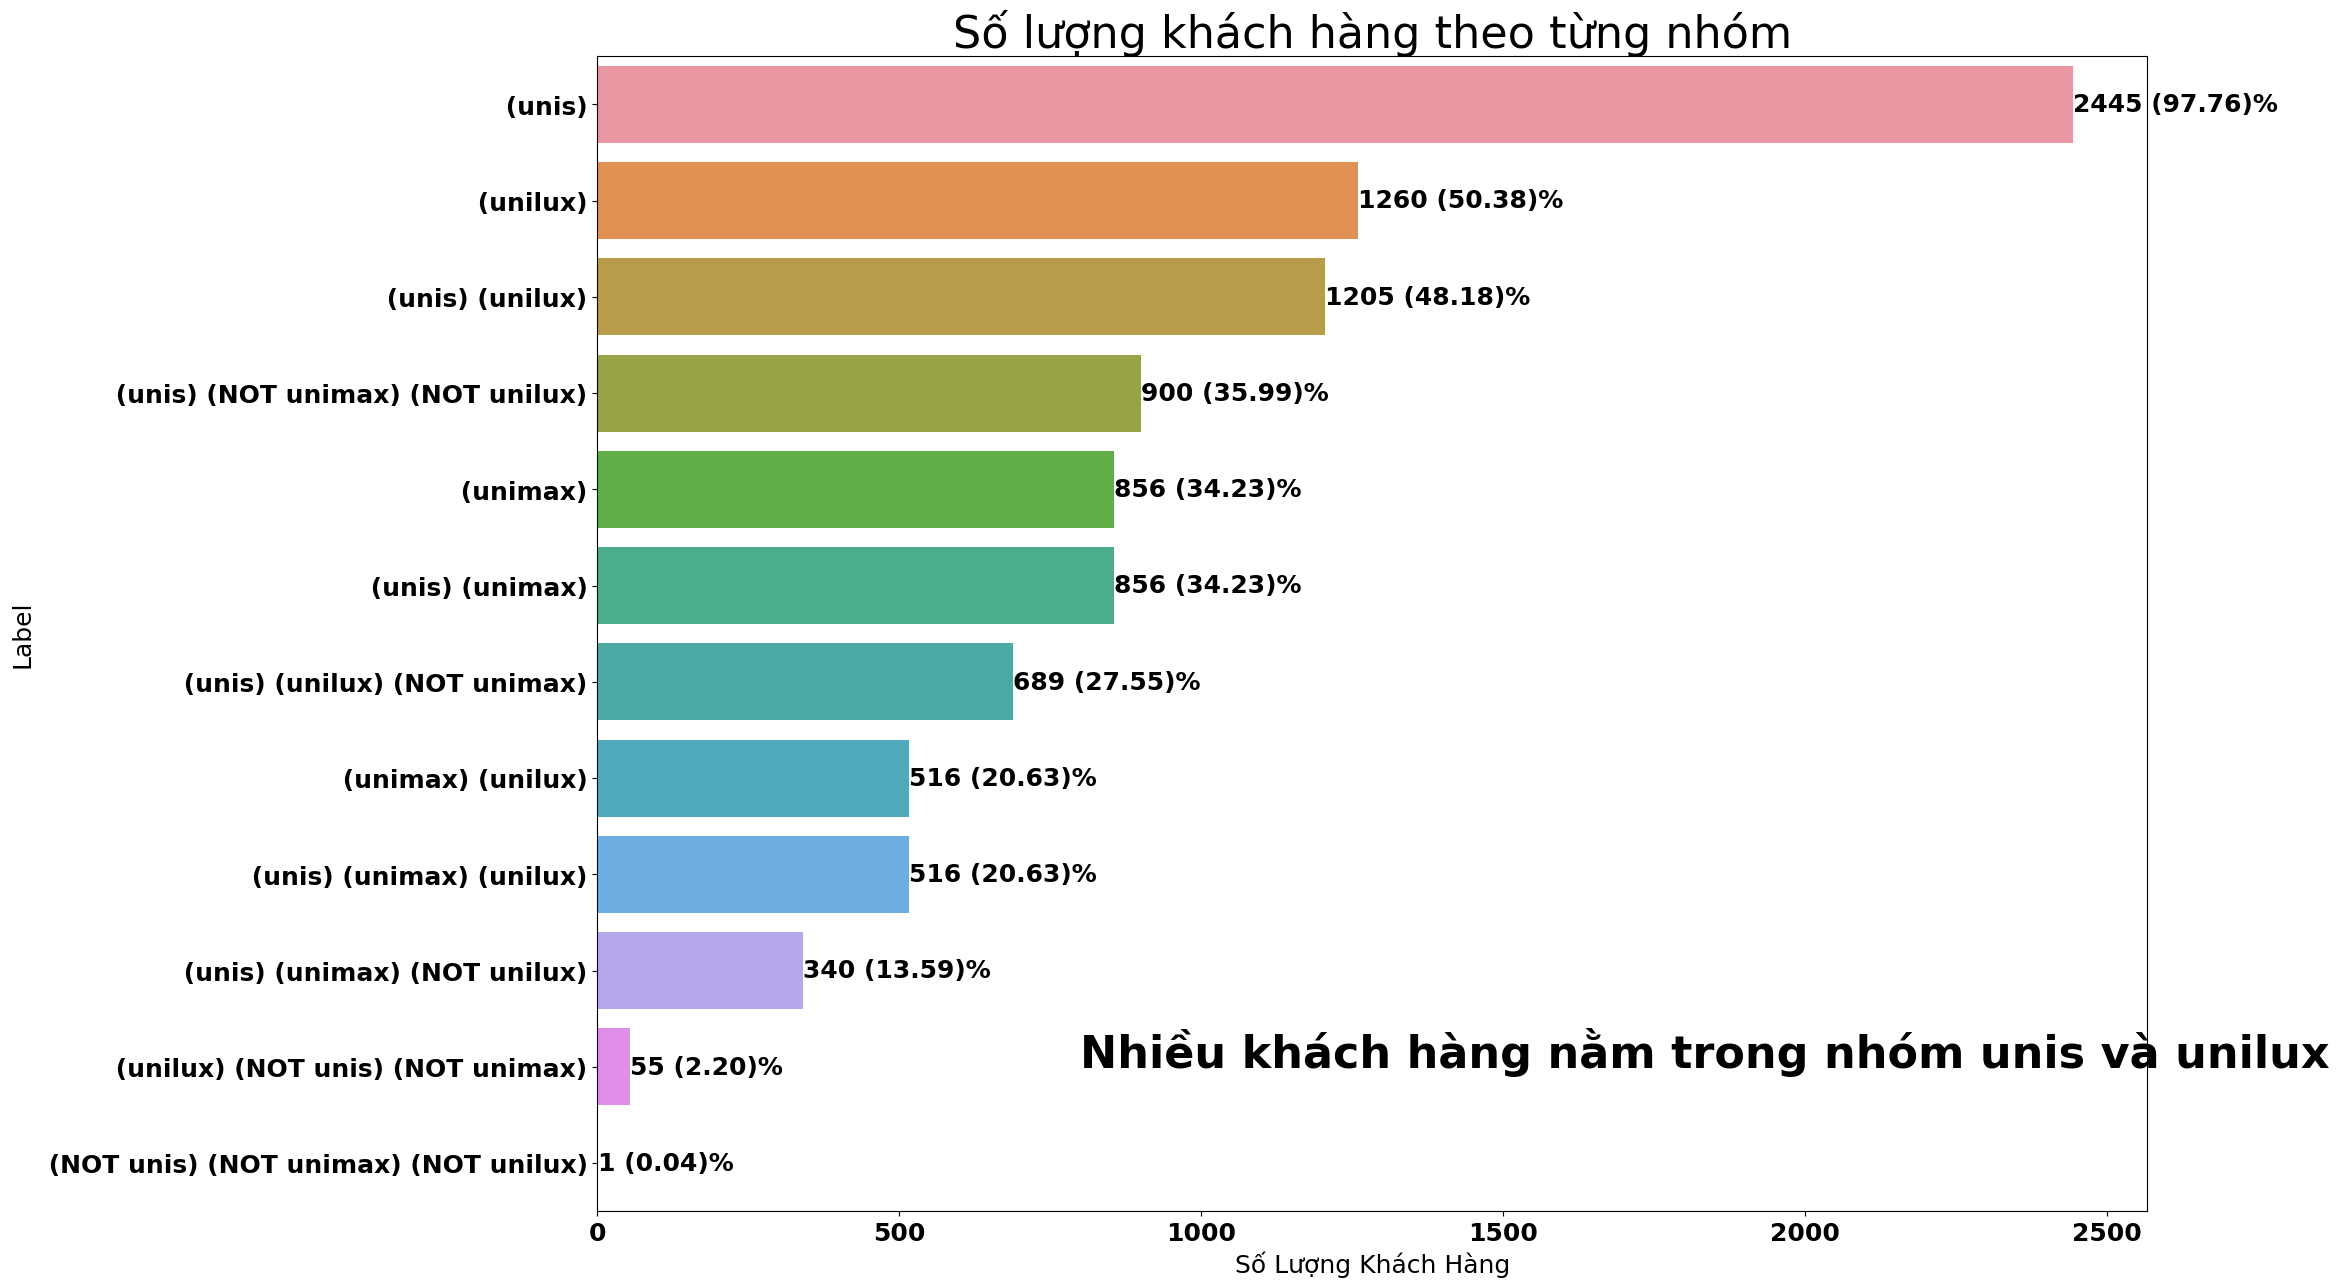

In [462]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, sharey = False, figsize = (20,15))
ax = sns.barplot(data=data_combination, x="Count", y="Label", ax=ax1, orient = 'h')
ax.set_xlabel('Số Lượng Khách Hàng')
ax.set_title("Số lượng khách hàng theo từng nhóm", fontsize=32)
plt1 = ax.bar_label(ax.containers[0], 
                    labels=["%s (%.2f)%%" % (count, percent) for count, percent in list(zip(*map(data_combination.get, ['Count', 'Count %']))) ])
plt1 = ax.text(800, 10, f"""Nhiều khách hàng nằm trong nhóm unis và unilux""", fontsize=32)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


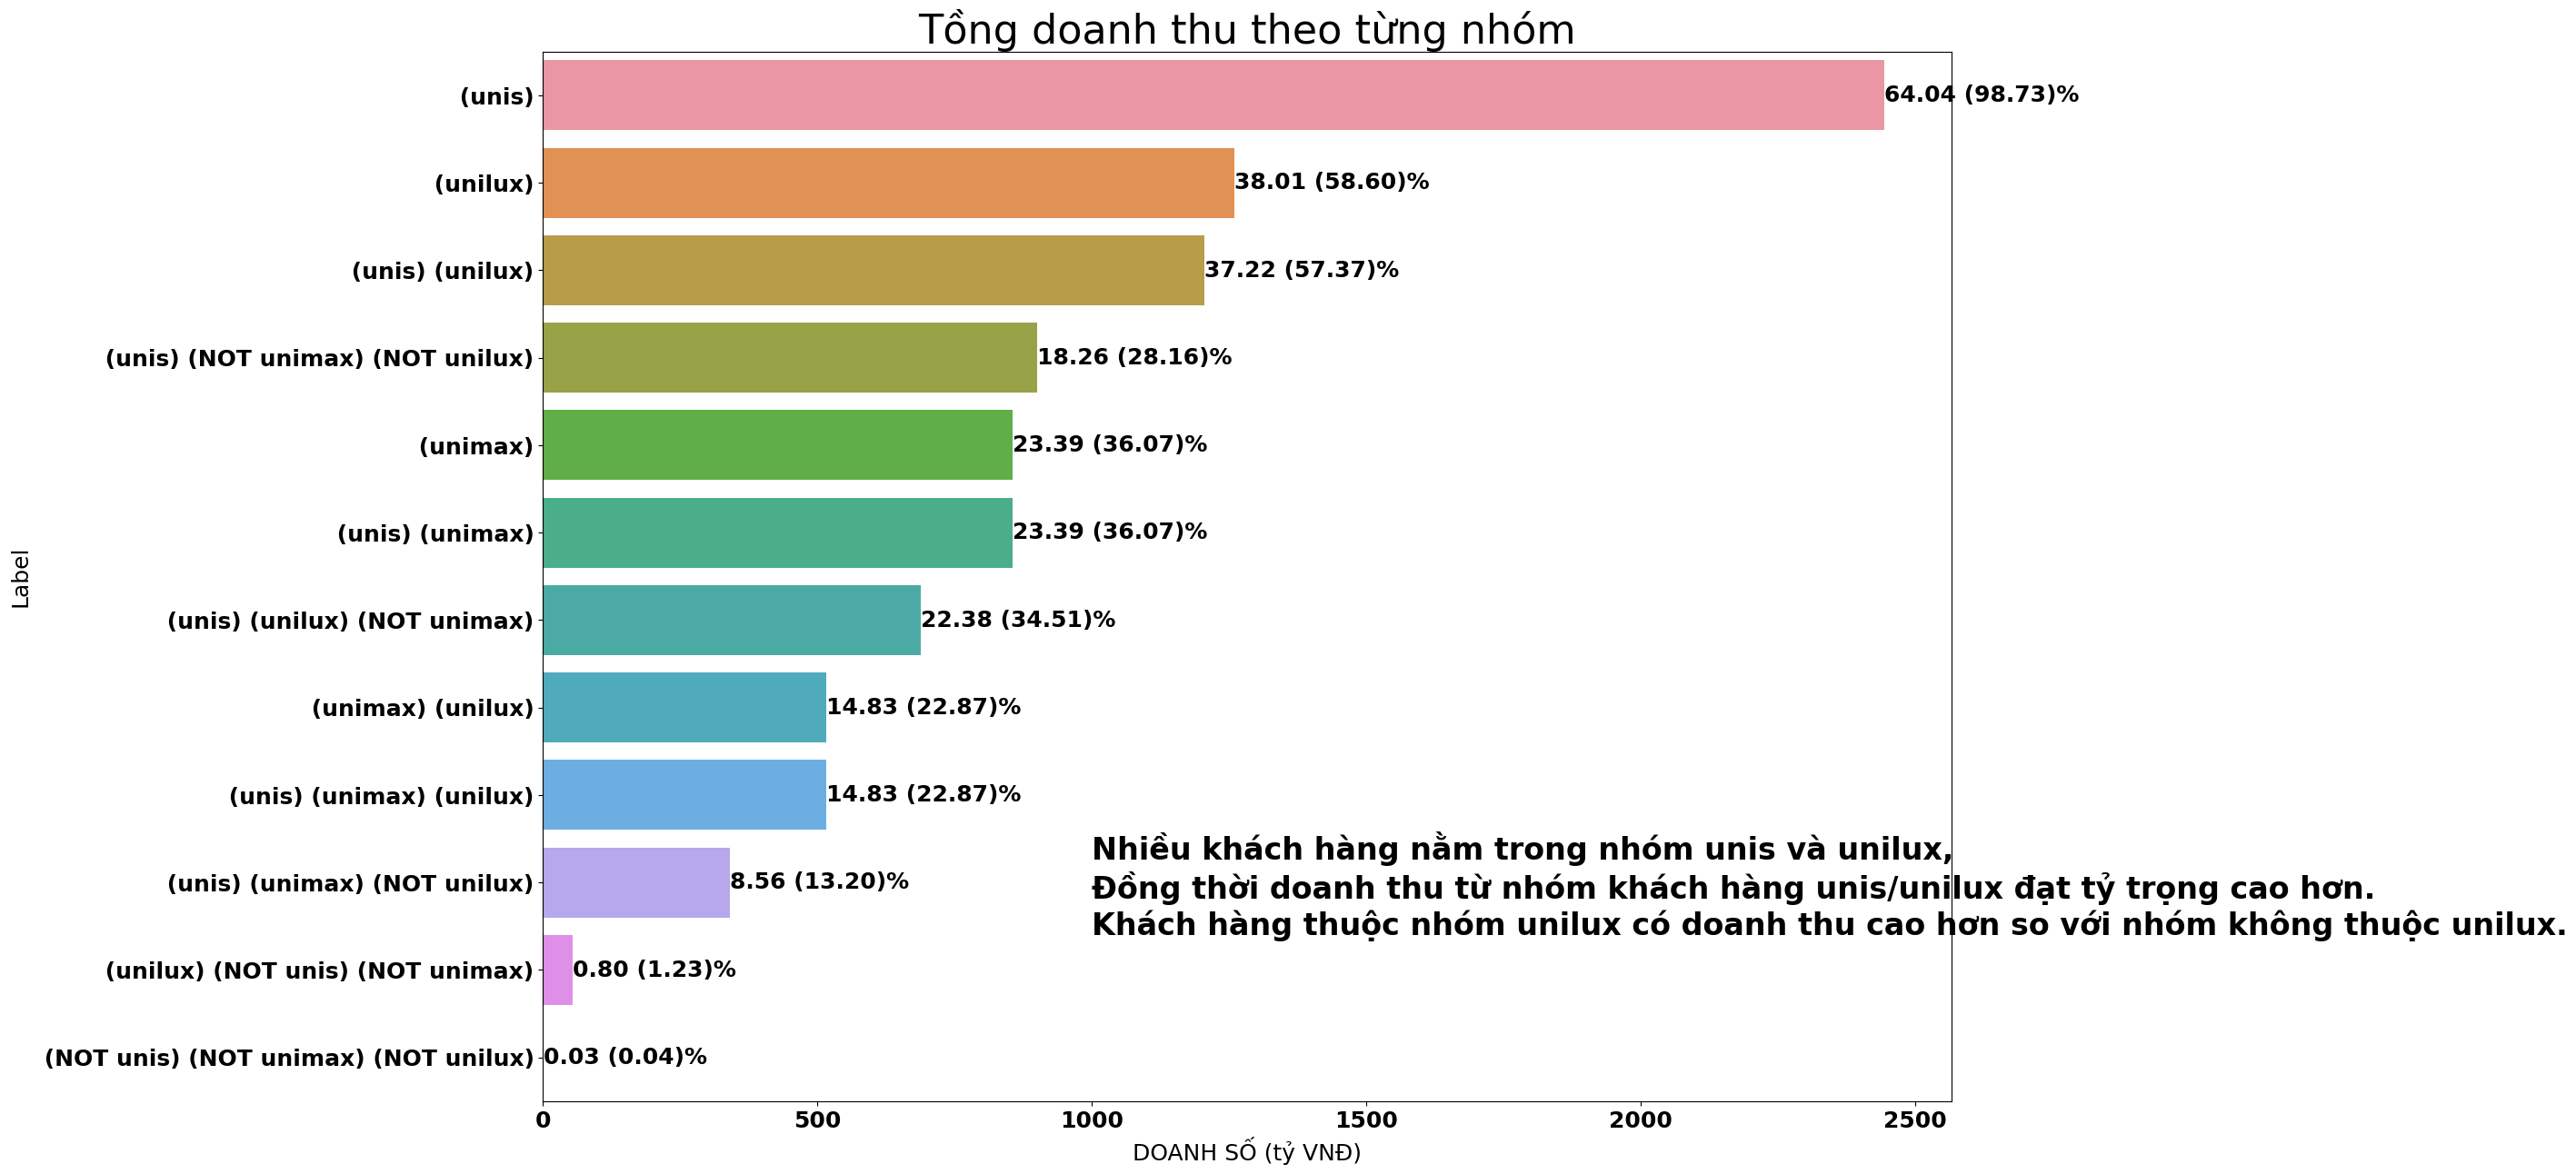

In [470]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, sharey = False, figsize = (20,15))
ax = sns.barplot(data=data_combination, x="Count", y="Label", ax=ax1, orient = 'h')
ax.set_xlabel('DOANH SỐ (tỷ VNĐ)')
ax.set_title("Tồng doanh thu theo từng nhóm", fontsize=32)
plt1 = ax.bar_label(ax.containers[0], 
                    labels=["%.2f (%.2f)%%" % (count / 1e9, percent) for count, percent in list(zip(*map(data_combination.get, ['DOANH SỐ', 'DOANH SỐ %']))) ]
                   )
plt1 = ax.text(1000, 10, f"""Nhiều khách hàng nằm trong nhóm unis và unilux,
Đồng thời doanh thu từ nhóm khách hàng unis/unilux đạt tỷ trọng cao hơn.
Khách hàng thuộc nhóm unilux có doanh thu cao hơn so với nhóm không thuộc unilux.
""", fontsize=24)


In [490]:
total_unis_employee = data['UNIS__Mã NVKD'].unique().shape[0]
total_unis_employee

164

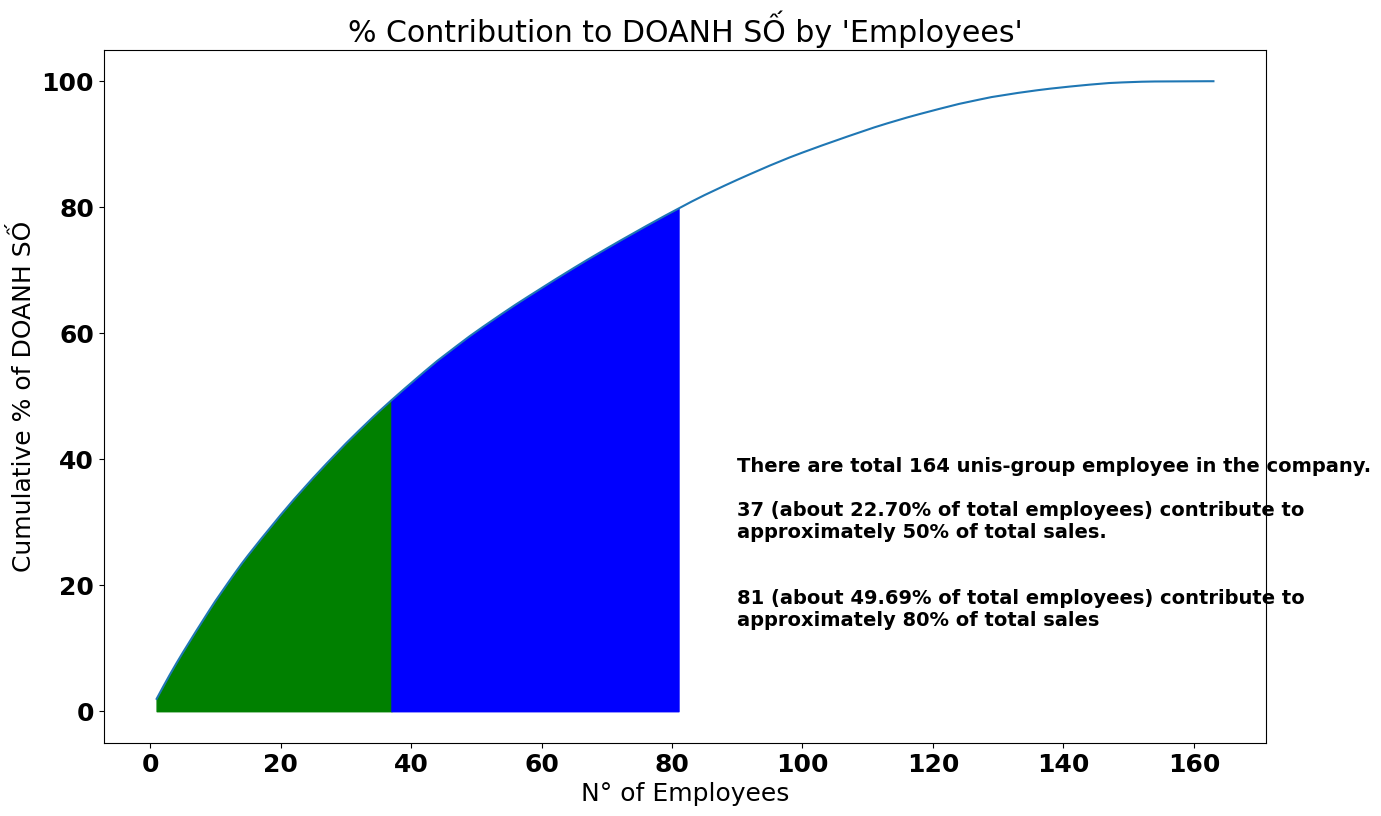

In [500]:
employee_revenue = data.groupby('UNIS__Mã NVKD')["DOANH SỐ"].sum().reset_index().sort_values("DOANH SỐ", ascending=False)

employee_revenue["% of DOANH SỐ"] = (employee_revenue["DOANH SỐ"] / employee_revenue["DOANH SỐ"].sum()) * 100
employee_revenue["Cumulative % of DOANH SỐ"] = employee_revenue["% of DOANH SỐ"].cumsum() 

total_group = employee_revenue.shape[0]
FIRST_THRESHOLD_PERCENTAGE = 50
total_first_group_contribute_to_threshold = (employee_revenue['Cumulative % of DOANH SỐ'] < FIRST_THRESHOLD_PERCENTAGE).sum()
first_group_meet_threshold = employee_revenue[employee_revenue['Cumulative % of DOANH SỐ'] > FIRST_THRESHOLD_PERCENTAGE].iloc[0]

SECOND_THRESHOLD_PERCENTAGE = 80
total_second_group_contribute_to_threshold = (employee_revenue['Cumulative % of DOANH SỐ'] < SECOND_THRESHOLD_PERCENTAGE).sum()
second_group_meet_threshold = employee_revenue[employee_revenue['Cumulative % of DOANH SỐ'] > SECOND_THRESHOLD_PERCENTAGE].iloc[0]



plt.figure(figsize=(15,9))
ax = sns.lineplot(x=range(1,len(employee_revenue)+1), y="Cumulative % of DOANH SỐ", data=employee_revenue)
ax.set_xlabel("N° of Employees")
ax.set_title("% Contribution to DOANH SỐ by 'Employees'")
a=np.arange(1,len(employee_revenue)+1)
b=employee_revenue["Cumulative % of DOANH SỐ"]
plt.fill_between(a, b, 0,
                 where = (a >= 0) & (a <= total_first_group_contribute_to_threshold),
                 color = 'g')
plt.fill_between(a, b, 0,
                 where = (a >= total_first_group_contribute_to_threshold) & (a <= total_second_group_contribute_to_threshold),
                 color = 'b')

ratio1 = "{:.2f}".format(total_first_group_contribute_to_threshold / total_group * 100)
ratio2 = "{:.2f}".format(total_second_group_contribute_to_threshold / total_group * 100)
plt1 = ax.text(90, 10, f"""
There are total {total_unis_employee} unis-group employee in the company.\n
{total_first_group_contribute_to_threshold} (about {ratio1}% of total employees) contribute to 
approximately {FIRST_THRESHOLD_PERCENTAGE}% of total sales.\n\n
{total_second_group_contribute_to_threshold} (about {ratio2}% of total employees) contribute to 
approximately {SECOND_THRESHOLD_PERCENTAGE}% of total sales
""", fontsize=14)